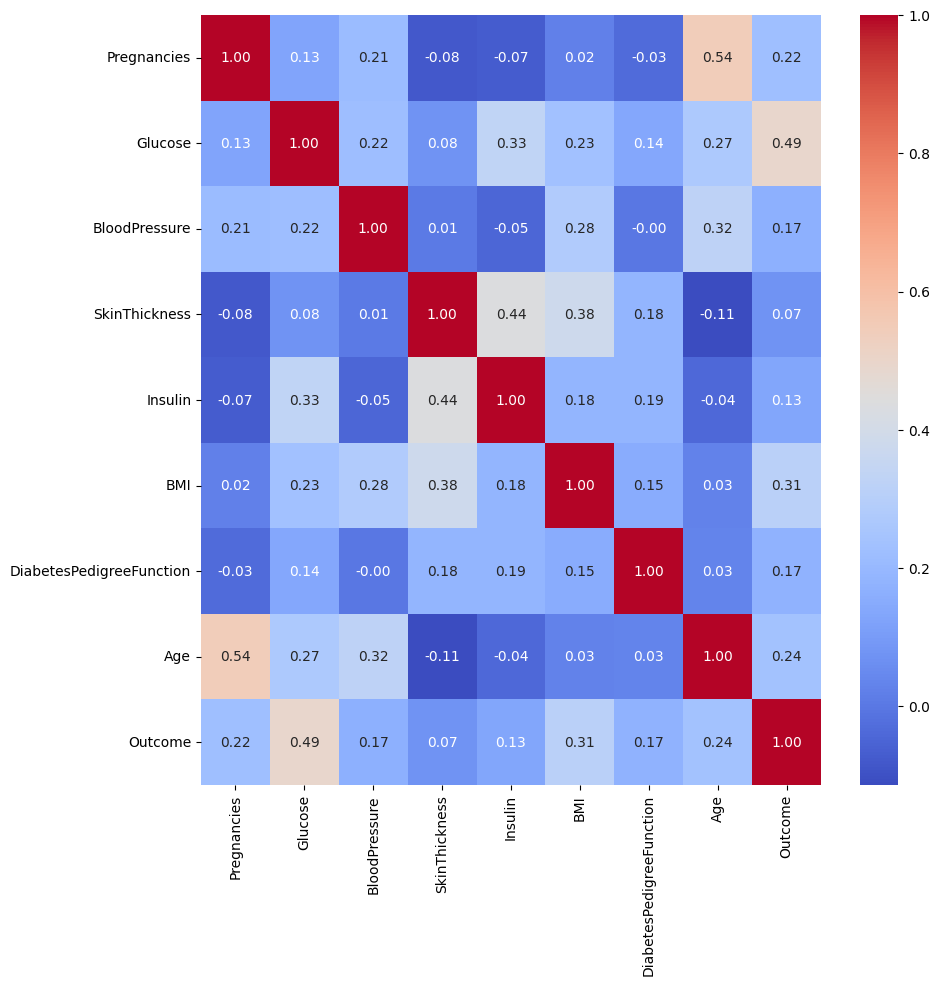

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for Logistic Regression: 76.17%
Accuracy for K-Nearest Neighbors: 71.36%
Accuracy for SVM (Linear Kernel): 76.57%
Accuracy for SVM (RBF Kernel): 75.53%
Best Model: SVM (Linear Kernel) with accuracy 0.7656527682843473
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import pickle
from flask import Flask, request, jsonify

def load_data(file, features, target_column):
    df = pd.read_csv("diabetes.csv")  # Corrected this line
    df[features] = df[features].replace(0, np.nan)
    imputer = SimpleImputer(strategy='mean')
    df[features] = imputer.fit_transform(df[features])
    return df

def correlations(df):
    corr = df.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()
    return corr

def evaluate(X, y):
    models = {
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM (Linear Kernel)': SVC(kernel='linear'),
        'SVM (RBF Kernel)': SVC(kernel='rbf')
    }
    results = {}
    for name, model in models.items():
        score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
        results[name] = score
        print(f"Accuracy for {name}: {score:.2%}")
    best_model = max(results, key=results.get)
    return models[best_model], results, best_model

def deploy(model, features, port=5000):
    app = Flask(__name__)

    @app.route('/predict', methods=['POST'])
    def predict():
        data = request.get_json()
        features = np.array([data[feature] for feature in features]).reshape(1, -1)
        prediction = model.predict(features)[0]
        return jsonify({'prediction': int(prediction)})

    app.run(host='0.0.0.0', port=port)

df = load_data('data.csv', ['Glucose', 'BloodPressure', 'BMI'], 'Outcome')
correlations(df)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
model, results, best_model_name = evaluate(X, y)
print(f"Best Model: {best_model_name} with accuracy {results[best_model_name]}")
deploy(model, X.columns.tolist())